# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [45]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

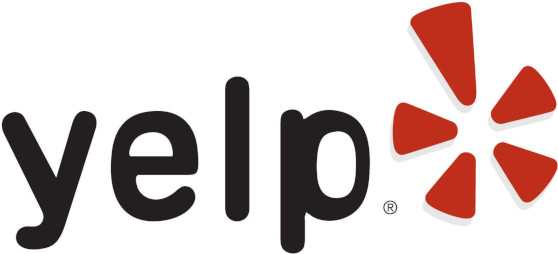

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [47]:
data = pd.read_csv('yelp_business.csv')
data.drop(data.columns[[0]], axis=1, inplace=True)
data.head(10)

,name,stars,longitude,postal_code,business_id,latitude,review_count,categories,city,is_open,hours,attributes,state
0,Arizona Biltmore Golf Clu,3.0,-112.018481,85016,b'1SWheh84yJXfytovILXOAQ',33.522143,5,Golf|Active Life,Phoenix,0,NaN,GoodForKids@False,AZ
1,Emerald Chinese Restaurant,2.5,-79.652289,L5R 3E7,b'QXAEGFB4oINsVuTFxEYKFQ',43.605499,128,Specialty Food|Restaurants|Dim Sum|Imported Fo...,Mississauga,1,Monday@9:0-0:0|Tuesday@9:0-0:0|Wednesday@9:0-0...,"RestaurantsReservations@True, GoodForMeal@dess...",ON
2,Musashi Japanese Restaurant,4.0,-80.859132,28210,b'gnKjwL_1w79qoiV3IC_xQQ',35.092564,170,Sushi Bars|Restaurants|Japanese,Charlotte,1,Monday@17:30-21:30|Wednesday@17:30-21:30|Thurs...,"GoodForKids@True, NoiseLevel@uaverage, Restaur...",NC
3,Farmers Insurance - Paul Lorenz,5.0,-112.395596,85338,b'xvX2CttrVhyG2z1dFg_0xw',33.455613,3,Insurance|Financial Services,Goodyear,1,Monday@8:0-17:0|Tuesday@8:0-17:0|Wednesday@8:0...,NaN,AZ
4,Queen City Plumbing,4.0,-80.887223,28217,b'HhyxOkGAM07SRYtlQ4wMFQ',35.190012,4,Plumbing|Shopping|Local Services|Home Services...,Charlotte,1,Monday@7:0-23:0|Tuesday@7:0-23:0|Wednesday@7:0...,"BusinessAcceptsBitcoin@False, ByAppointmentOnl...",NC
5,The UPS Store,2.5,-79.711584,L5V 0B1,b'68dUKd8_8liJ7in4aWOSEA',43.599475,3,Shipping Centers|Couriers & Delivery Services|...,Mississauga,1,Monday@9:0-19:0|Tuesday@9:0-20:0|Wednesday@9:0...,"BusinessParking@garage@False, street@False, va...",ON
6,Edgeworxx Studio,3.5,-114.001828,T2Z 1K4,b'5JucpCfHZltJh5r1JabjDg',50.943646,7,Beauty & Spas|Hair Salons,Calgary,1,NaN,"RestaurantsPriceRange2@2, BusinessParking@gara...",AB
7,Supercuts,3.5,-115.074574,89121,b'gbQN7vr_caG_A1ugSmGhWg',36.099872,3,Hair Salons|Hair Stylists|Barbers|Mens Hair Sa...,Las Vegas,1,Monday@10:0-19:0|Tuesday@10:0-19:0|Wednesday@1...,"RestaurantsPriceRange2@3, GoodForKids@True, Bu...",NV
8,Vita Bella Fine Day Spa,5.0,-112.188568,85308,b'Y6iyemLX_oylRpnr38vgMA',33.654815,8,Nail Salons|Beauty & Spas|Day Spas,Glendale,0,Tuesday@12:0-18:0|Wednesday@10:0-18:0|Thursday...,"RestaurantsPriceRange2@2, ByAppointmentOnly@Tr...",AZ
9,Options Salon & Spa,4.5,-81.854097,44126,b'4GBVPIYRvzGh4K4TkRQ_rw',41.440825,8,Beauty & Spas|Nail Salons|Day Spas|Massage,Fairview Park,1,Tuesday@9:0-21:0|Wednesday@9:0-21:0|Thursday@9...,"ByAppointmentOnly@False, BusinessAcceptsCredit...",OH


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [48]:
number = data.groupby(by='city',
                      sort=True).count().sort_values(
    by='is_open', ascending=False).is_open.reset_index().rename(
    columns={'is_open': 'number of companies'})
number.head(5)

,city,number of companies
0,Las Vegas,29370
1,Toronto,18906
2,Phoenix,18766
3,Charlotte,9509
4,Scottsdale,8837


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

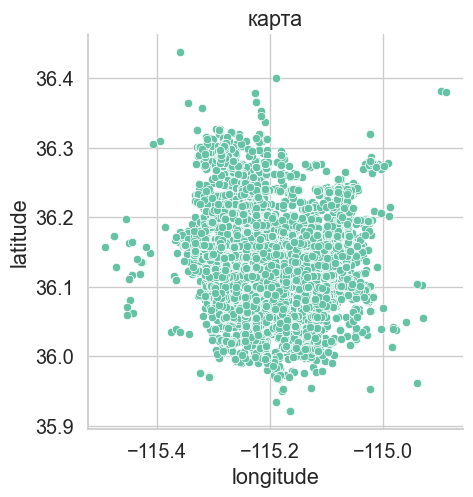

In [49]:
data = data[data['city'] == 'Las Vegas']
sns.relplot(data=data, x='longitude', y='latitude')
plt.title('карта')
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

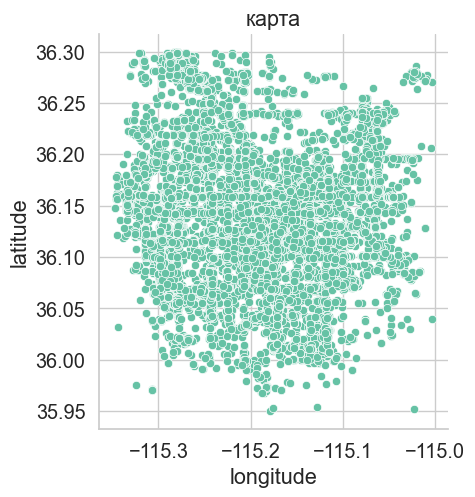

In [50]:
data = data[data['city'] == 'Las Vegas']
data = data[(data['longitude'] < -115) & (data['longitude'] > -115.35)]
data = data[(data['latitude'] > 35.95) & (data['latitude'] < 36.3)]
sns.relplot(data=data, x='longitude', y='latitude')
plt.title('карта')
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [51]:
import folium

lat = data['latitude']
lon = data['longitude']
name = data['name']
map = folium.Map(location=[36.15, -115.15], zoom_start=11, tiles="CartoDB dark_matter")
# Навскидку из графика выше центр Las Vegas'а имеет координаты (36.15, -115.15)
for lat, lon, name in zip(lat, lon, name):
    folium.CircleMarker(location=[lat, lon], radius=1, popup=str(name),
                        fill_color='blue', color='blue', fill_opacity=0.2,
                        opacity=0.2).add_to(map)
folium.CircleMarker(location=[36.15, -115.15], radius=2, popup='center point',
                    fill_color='red', color='red',
                    fill_opacity=0.2).add_to(map);
# map.save("map.html")
# map

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [52]:
review = pd.read_csv("yelp_review.csv")
review.drop(review.columns[[0]], axis=1, inplace=True)
review

MemoryError: Unable to allocate 40.1 MiB for an array with shape (5261668,) and data type object

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
review.set_index('business_id')
review = review.loc[review['business_id'].isin(data['business_id'])]
review

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
review = review.groupby(by='business_id').aggregate([np.mean, np.size]).stars

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
review = review.rename(columns={'mean': 'средняя оценка', 'size': 'кол-во оценок'})
review

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
data.set_index('business_id')
table = pd.merge(review, data, on='business_id')

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
plt.figure(figsize=(9, 9))
sns.scatterplot(data=table, x='longitude', y='latitude',
                hue='средняя оценка', alpha=0.2)
plt.legend(title='stars')
plt.title('Las Vegas companies')
plt.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
table['latitude'] = np.round(
    np.floor(20 * table['latitude']) * 0.05 + 0.025, decimals=3)
table['longitude'] = np.round(
    -np.floor((-20) * table['longitude']) * 0.05 - 0.025, decimals=3)

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
tabular = pd.pivot_table(table.rename(columns={'средняя оценка': ''}), values=[''],
                         index=['latitude'], columns=['longitude'], aggfunc=np.mean)
heated = sns.heatmap(tabular, annot=True, linewidth=.7)
heated.set(xlabel='longitude', ylabel='latitude')

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 
Неправильно основывать результаты на полученных оценках для районов с всего несколькими компаниями. Так, например, в районе могут оказаться всего пара компаний с оценками 5, что не характеризует общее распределение оценок, как было бы естественно того требовать. Цветовая гамма на графике должна быть скорректирована - при выборе максимального и минимального значений не должны рассматриваться регионы с малым числом компаний. Также из-за того, что heatmap автоматически подстроил vmax и vmin информация о районах недостаточно детализированная в смысле контрастности. Необходимо настроить значения вручную. Такой подход решит проблему контрастности между ячейками и задаст интересующие границы в соответствии с цветовой гаммой.
Такое улучшение выполняется в следующем задании.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
table['exists'] = 1
sieved_tabular = pd.pivot_table(table.rename(columns={'exists': ''}), values=[''],
                                index=['latitude'], columns=['longitude'], aggfunc=np.sum)
print(sieved_tabular)
print(tabular)
heated = sns.heatmap(tabular, annot=True, linewidth=.7, vmin=3.259227, vmax=4.110628)
heated.set(xlabel='longitude', ylabel='latitude')

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** В принципе получено ровно то, о чём написано в ответе к предыдущему заданию. Без учёта ненужных районов цветовая гамма сменилась.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>